In [1]:
import pandas as pd

df = pd.read_csv("../data/titanic.csv")  # Ajusta la ruta según tu ubicación
print(df.sample(3))



     PassengerId  Survived  Pclass                                  Name  \
399          400         1       2      Trout, Mrs. William H (Jessie L)   
541          542         0       3  Andersson, Miss. Ingeborg Constanzia   
342          343         0       2            Collander, Mr. Erik Gustaf   

        Sex   Age  SibSp  Parch  Ticket    Fare Cabin Embarked  
399  female  28.0      0      0  240929  12.650   NaN        S  
541  female   9.0      4      2  347082  31.275   NaN        S  
342    male  28.0      0      0  248740  13.000   NaN        S  


In [ ]:
df.sample(3)

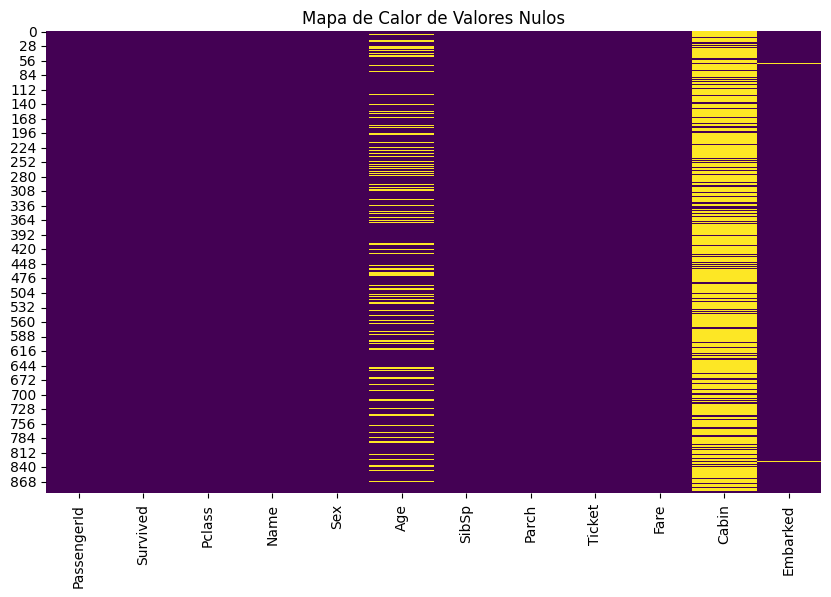

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataframe se llama 'df'
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [4]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


In [5]:
df.drop('Cabin', axis = 1, inplace = True)

In [6]:
# Calcular la mediana de la columna Age
median_age = df['Age'].median()

# Imputar los valores nulos con la mediana
df['Age'].fillna(median_age, inplace=True)

/tmp/ipykernel_42277/686027435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [12]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [13]:
df.to_csv('./data/titanic_clean.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'

In [14]:
df.to_csv('../data/titanic_clean.csv', index=False)
